# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Fashion MNIST
Hello world for computer vision tasks.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

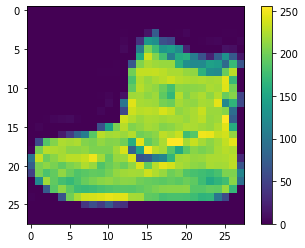

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

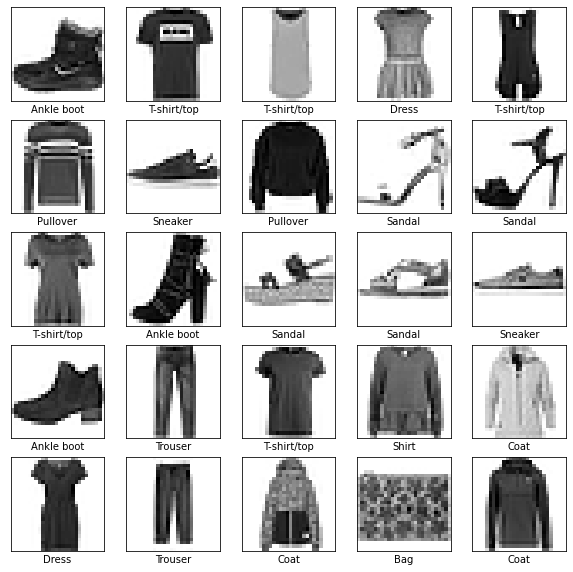

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

The model learns to associate images and labels.

You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.

## Feed the model

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4940 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

## Evaluate accuracy

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3228 - accuracy: 0.8858

Test accuracy: 0.8858000040054321


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

Demonstrate overfitting

Strategies to prevent overfitting

## Make predictions

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [20]:
# First prediction
predictions[0]

array([1.4900674e-05, 1.0703145e-07, 2.5774245e-06, 3.5557854e-09,
       2.8763324e-07, 2.3116923e-03, 7.2953621e-06, 1.2496330e-02,
       8.1334787e-05, 9.8508543e-01], dtype=float32)

In [23]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 
# 10 different articles of clothing. You can see which label has the highest confidence value:
np.argmax(predictions[0])

9

In [24]:
# Check the real label
test_labels[0] # THEREFORE it was right

9

In [25]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions

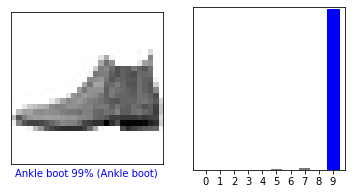

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

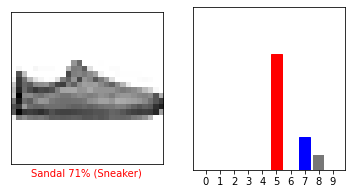

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

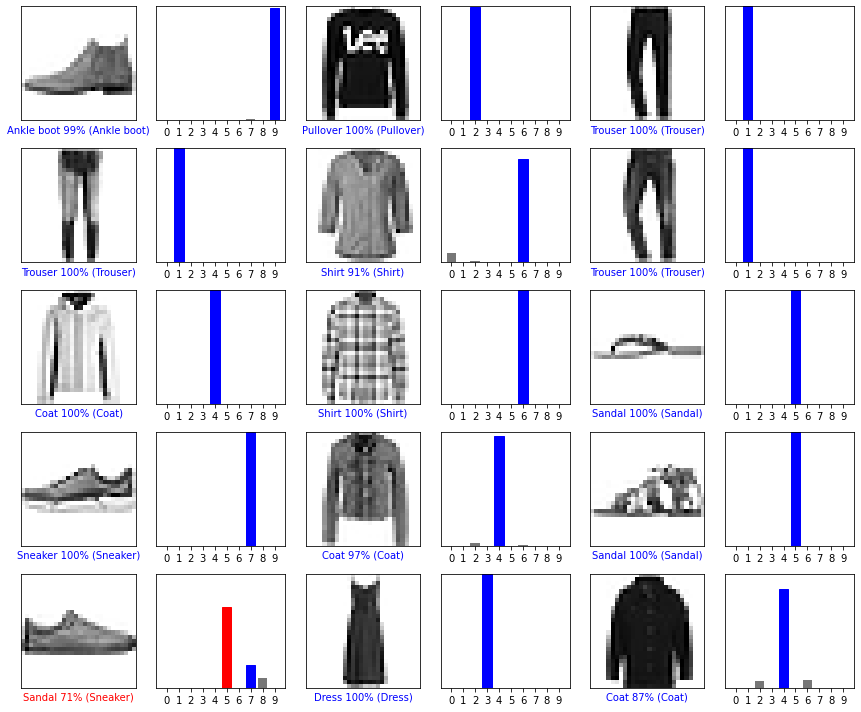

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [31]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1945438e-05 9.8445193e-15 9.9830401e-01 2.1995275e-11 1.3809873e-03
  4.0601991e-11 3.0295373e-04 1.6270631e-11 3.5435981e-11 5.7951430e-13]]


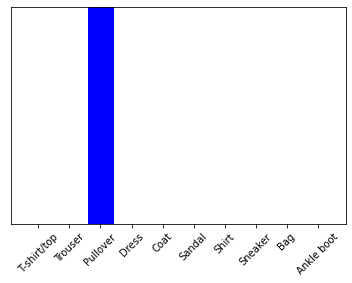

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [35]:
np.argmax(predictions_single[0])

2